In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.shape
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# Removing Redundant Features

In [5]:
data.drop(columns = ['loan_id'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


# One-Hot Encoding the categorical features

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        data[i]=le.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [7]:
y=data[" loan_status"]
x=data.drop([" loan_status"],axis = 1)

# Heatmap to observe correlation

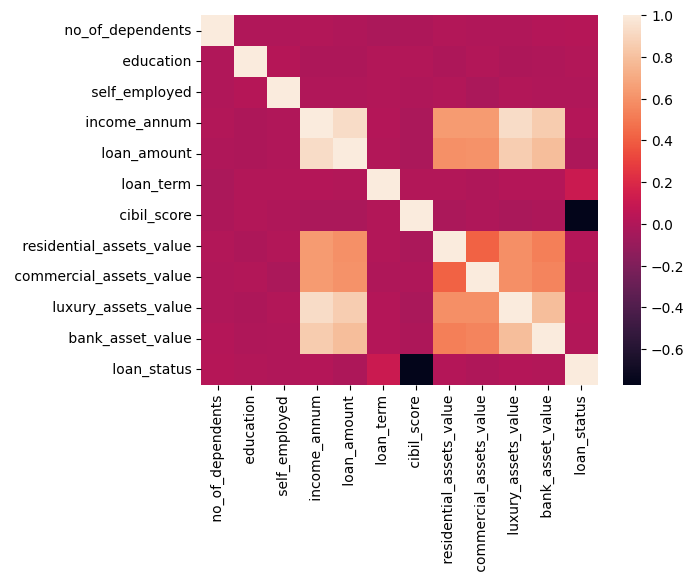

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr())
plt.show()

# Normalize and Standardize features

In [9]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
x=scaler.fit_transform(x)
x=Normalizer().fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Precision: {precision_score(y_test,y_pred)}")
print(f"Accuracy: {f1_score(y_test,y_pred)}")
print(f"Accuracy: {recall_score(y_test,y_pred)}")

Accuracy: 0.936768149882904
Precision: 0.9217758985200846
Accuracy: 0.9150052465897166
Accuracy: 0.9083333333333333


# Confusion Matrix

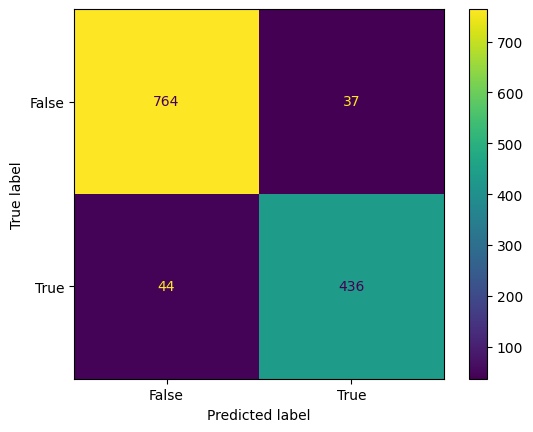

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_true = y_test
confusion_matrix = metrics.confusion_matrix(y_true,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [False,True])
cm_display.plot()
plt.show()

# ROC Curve

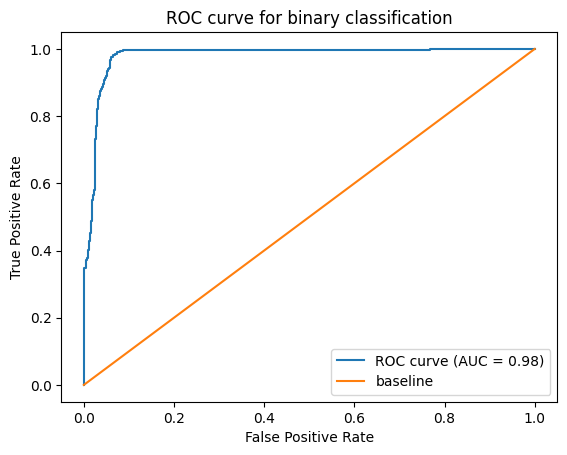

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

# Random Forest Classifier

In [15]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x,y,test_size = 0.4)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
model01 = RandomForestClassifier(random_state = 0)
model01.fit(x1_train,y1_train)
y_pred = model01.predict(x1_test)

print(f"Accuracy Score: {accuracy_score(y1_test,y_pred)}")
print(f"F1 Score: {f1_score(y1_test,y_pred)}")
print(f"Precision Score: {precision_score(y1_test,y_pred)}")
print(f"Recall Score: {recall_score(y1_test,y_pred)}")

Accuracy Score: 0.9613583138173302
F1 Score: 0.9503012048192772
Precision Score: 0.940387481371088
Recall Score: 0.9604261796042618


# Hyperparameter tuning (using different n_estimators and n_jobs)

In [17]:
model02=RandomForestClassifier(n_estimators=10, n_jobs=1,random_state=0)
model02.fit(x_train,y_train)
y_pred=model02.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.967
Precision score: 0.964
Recall score: 0.966
F1 score: 0.965


Accuracy score: 0.973
Precision score: 0.969
Recall score: 0.974
F1 score: 0.971


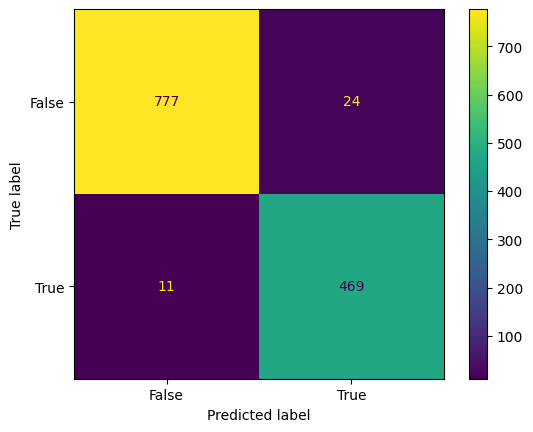

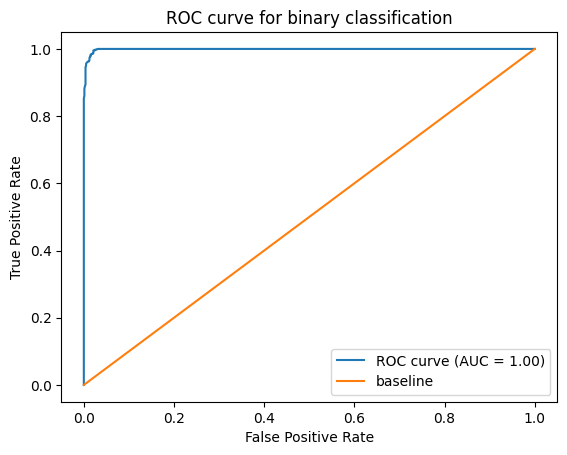

In [18]:
model03=RandomForestClassifier(n_estimators=50, n_jobs=2,random_state=0)
model03.fit(x_train,y_train)
y_pred=model03.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

from sklearn import metrics
import matplotlib.pyplot as plt
y_true = y_test
confusion_matrix = metrics.confusion_matrix(y_true,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [False,True])
cm_display.plot()
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict the probabilities of the positive class
y_pred = model01.predict_proba(x_test)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

In [19]:
model04=RandomForestClassifier(n_estimators=100, n_jobs=3,random_state=0)
model04.fit(x_train,y_train)
y_pred=model04.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.971
Precision score: 0.967
Recall score: 0.971
F1 score: 0.969


# XG Boost Classifier

Accuracy score: 0.964

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       536
           1       0.95      0.95      0.95       318

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



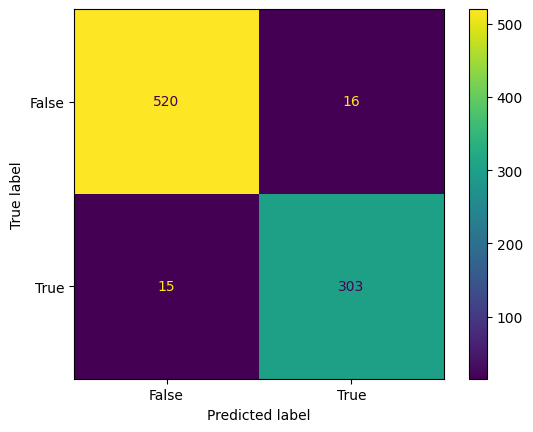

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgboost_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Fit the model
xgboost_classifier.fit(x_train, y_train)

# Make predictions
y_pred = xgboost_classifier.predict(x_test)

# Evaluate the model
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



y_true = y_test
confusion_matrix = metrics.confusion_matrix(y_true,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [False,True])
cm_display.plot()
plt.show()


# Hyper Parameter Tuning the model

Best parameters found: {'colsample_bytree': 0.7364265404201034, 'gamma': 0.5673676062029454, 'learning_rate': 0.28740808548356883, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 312, 'reg_alpha': 0.659984046034179, 'reg_lambda': 0.8172222002012158, 'scale_pos_weight': 1, 'subsample': 0.8066543565084057}
Accuracy score: 0.965

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       536
           1       0.95      0.95      0.95       318

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



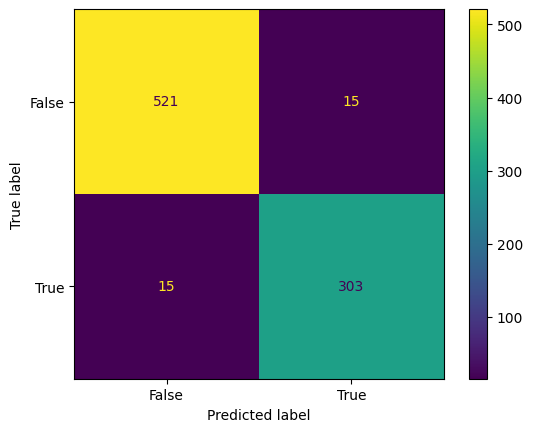

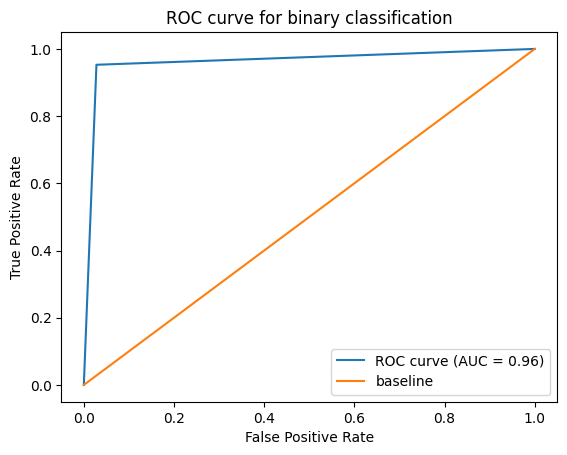

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(2, 10),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'scale_pos_weight': [1, (y_train.value_counts()[0] / y_train.value_counts()[1])],
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(x_train, y_train)

# Best estimator
best_model = random_search.best_estimator_
print(f"Best parameters found: {random_search.best_params_}")

# Predict using the best model
y_pred = best_model.predict(x_test)

# Evaluate the model
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_true = y_test
confusion_matrix = metrics.confusion_matrix(y_true,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [False,True])
cm_display.plot()
plt.show()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(fpr, tpr)
x1=np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot(x1,x1,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()
